## 개요 
* 국민건강보험공단 건강검진정보를 활용한 간단한 분석<br>
[공공데이터포털 국민건강보험공단_건강검진정보](https://www.data.go.kr/data/15007122/fileData.do)

* 실습 기록용으로 남깁니다.

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('국민건강보험공단_건강검진정보_20221231.CSV', encoding="cp949")

In [4]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')

### 음주여부, 흡연상태, 연령대코드, 성별코드간의 상관관계

* 상관계수 구하기

In [5]:
filtered = df[['음주여부','흡연상태','연령대코드(5세단위)','성별']].copy()
filtered.corr()

,음주여부,흡연상태,연령대코드(5세단위),성별
음주여부,1.000000,0.252058,-0.357367,-0.254963
흡연상태,0.252058,1.000000,-0.073601,-0.536833
연령대코드(5세단위),-0.357367,-0.073601,1.000000,0.042162
성별,-0.254963,-0.536833,0.042162,1.000000


* 상관계수 시각화 (Seaborn heatmap)

<Axes: >

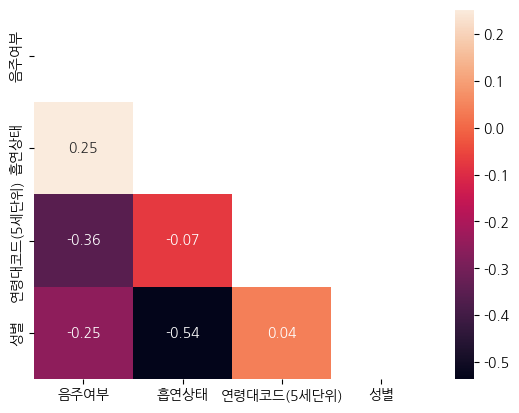

In [6]:
#mask옵션 사용하고, annot옵션으로 수치표기, fmt옵션으로 소수자리 지정하여 heatmap으로 표현
mask = np.triu(np.ones_like(filtered.corr(), dtype=bool))
sns.heatmap(filtered.corr(), annot=True, fmt='.2f', mask=mask)

* 상관관계가 강한 순으로 나열
  * 성별과 흡연, 음주와 연령의 뚜렷한 상관관계
  * 흡연과 음주의 약한 상관관계
> [참고]<br>
-1.0과 -0.7 사이이면, 강한 음적 선형관계<br>
  -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계<br>
  -0.3과 -0.1 사이이면, 약한 음적 선형관계<br>
  -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계<br>
  +0.1과 +0.3 사이이면, 약한 양적 선형관계<br>
  +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계<br>
  +0.7과 +1.0 사이이면, 강한 양적 선형관계<br>

In [7]:
#상관계수로 표를 만들어, 강한 상관관계가 있는 순으로 조사해보았습니다 (절대값으로 내림차순)
con_index = []
con_value = []
con_value_abs= []
for i in filtered.corr().columns:
    for j in filtered.corr().index:
        con_index.append(i +"/" + j)
        con_value.append(filtered.corr()[i][j])
        con_value_abs.append(abs(filtered.corr()[i][j]))
pd.DataFrame({'상관계수':con_value,
             '절대값':con_value_abs,
             '항목':con_index}).sort_values(by=['절대값'],ascending=False)

,상관계수,절대값,항목
0,1.000000,1.000000,음주여부/음주여부
5,1.000000,1.000000,흡연상태/흡연상태
10,1.000000,1.000000,연령대코드(5세단위)/연령대코드(5세단위)
15,1.000000,1.000000,성별/성별
7,-0.536833,0.536833,흡연상태/성별
13,-0.536833,0.536833,성별/흡연상태
2,-0.357367,0.357367,음주여부/연령대코드(5세단위)
8,-0.357367,0.357367,연령대코드(5세단위)/음주여부
3,-0.254963,0.254963,음주여부/성별
12,-0.254963,0.254963,성별/음주여부


### 흡연과 음주에 대한 추이
* 앞서 약한 상관관계였던 흡연과 음주에 대한 인원추이

In [8]:
# 코드를 실제값으로 변환
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df['흡연상태'] = df['흡연상태'].replace(smoke)
df['음주여부'] = df['음주여부'].replace(drink)

In [9]:
# '흡연상태','음주여부'만 가져와 crosstab
filtered_drink_smoke = df[['흡연상태','음주여부']]
df_crosstab = pd.crosstab(index=filtered_drink_smoke['음주여부'],columns=filtered_drink_smoke['흡연상태'])
df_crosstab

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,132750,360530,161804
안마심,33815,280441,30504


Text(0.5, 1.0, '흡연상태별 음주여부')

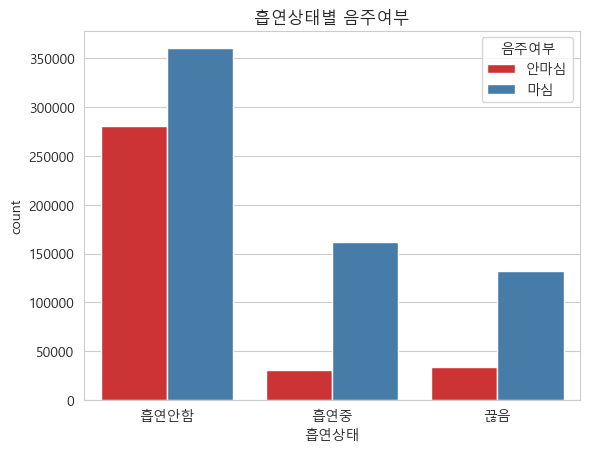

In [10]:
# countplot 시각화
sns.set_style('whitegrid')
plt.rc('font',family="Malgun Gothic")
sns.countplot(data=filtered_drink_smoke, x='흡연상태', hue='음주여부', palette='Set1').set_title('흡연상태별 음주여부') # palette = 그래프테마

* 흡연중이거나 했다가 끊은 경우에는 음주하는 사람의 비중이 높음
* 흡연을 안하는 경우는 음주여부의 비중 차이가 크지 않음

### 음주여부에 따른 콜레스테롤과 감마지티피의 관계
* 감마지티피 : 알콜에 의한 간장애의 지표를 나타내는 검사항목

* 각 항목을 산점도로 시각화하여 파악

In [12]:
df_temp = df[['총콜레스테롤','감마지티피','음주여부','흡연상태']]

<Figure size 1400x1400 with 0 Axes>

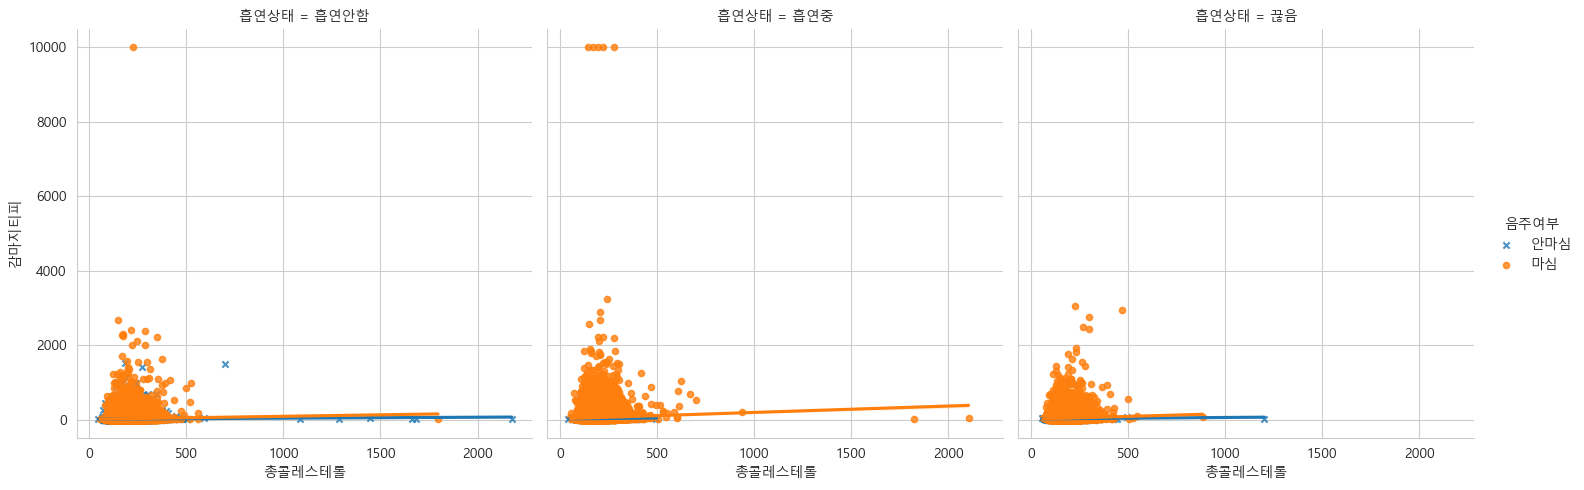

In [13]:
# lmplot 산점도
plt.figure(figsize=(14,14))
sns.lmplot(data=df_temp, x='총콜레스테롤', y='감마지티피', hue='음주여부', col='흡연상태',markers=['x','o'] # markers로 음주여부에 따라 o,x로
           ,scatter_kws={'s':20}) # 뭉쳐진부분이 잘보이도록 scatter_kws로 점크기조정

* 대체로 특정 구역에 몰려있음, 체중 120kg 이상에 대해서 추가분석

<Figure size 1400x1400 with 0 Axes>

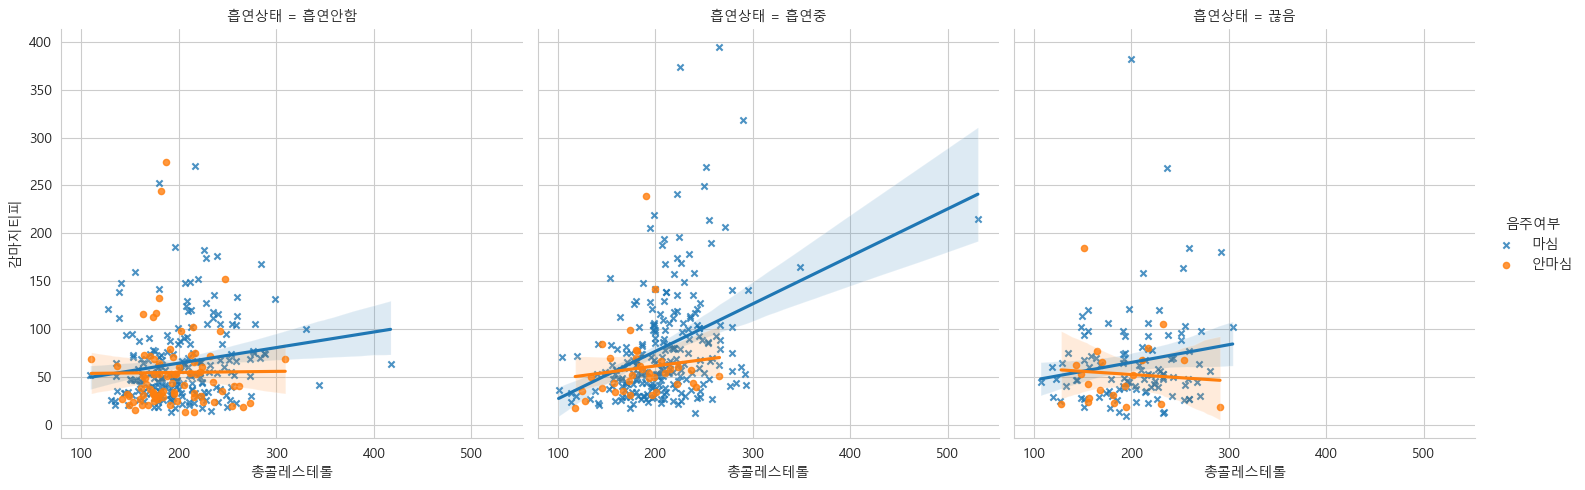

In [15]:
weight_over120 = df.loc[(df['체중(5kg단위)'] >= 120), ['총콜레스테롤','감마지티피','음주여부','흡연상태']]
plt.figure(figsize=(14,14))
sns.lmplot(data=weight_over120, x='총콜레스테롤', y='감마지티피', hue='음주여부', col='흡연상태',markers=['x','o']
           ,scatter_kws={'s':20})

* 흡연중인 경우, 흡연을 안하거나 끊은 경우보다 감마지피티의 값이 높게 분포
* 음주여부에 따라 콜레스테롤의 차이는 크게 보이지 않으나, 감마지티피의 경우 모두 상승하는 경향

### 연령대별 시력 확인

In [17]:
# 별도로 정의해둔 연령코드 딕셔너리
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

# 실명(시력 9.9) 제거
sight_right = df.drop(df.loc[df['시력(우)']==9.9,].index)
sight_left = df.drop(df.loc[df['시력(좌)']==9.9,].index)

#숫자료 표기되는 연령대코드를 연령구간으로 표기할 index 생성 후 replace로 변경 (barplot의 index로 사용)
age_code_right = []
for i in np.sort(sight_right['연령대코드(5세단위)'].unique()).tolist():
    age_code_right.append(age_code[i])
age_code_left = []
for i in np.sort(sight_left['연령대코드(5세단위)'].unique()).tolist():
    age_code_left.append(age_code[i])

sight_right['연령대코드(5세단위)'] = sight_right['연령대코드(5세단위)'].replace(age_code)
sight_left['연령대코드(5세단위)'] = sight_left['연령대코드(5세단위)'].replace(age_code)

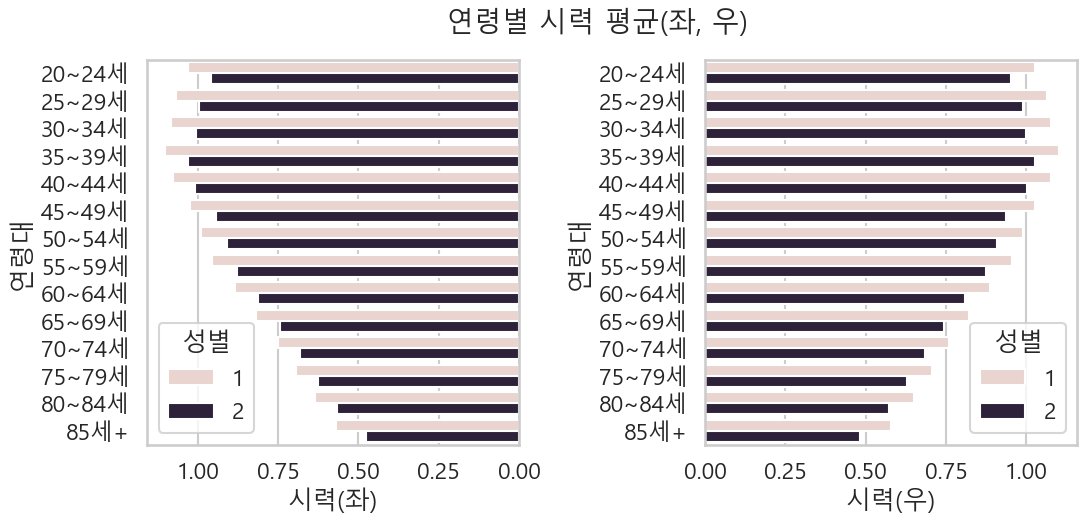

In [20]:
#시력(좌), (우) 그래프를 식별하기 용이하도록 (좌)그래프를 회전
fig, axs = plt.subplots(ncols=2, figsize=(12,5),
                       gridspec_kw={'wspace':0.5},)
fig.suptitle('연령별 시력 평균(좌, 우)').set_size(20) #제목

sns.set_context('talk')

sns.barplot(data = sight_left, x='시력(좌)', y='연령대코드(5세단위)', hue='성별', orient='h', errorbar=None, ax=axs[0],
            order=age_code_left).invert_xaxis()
sns.barplot(data = sight_right, x='시력(우)', y='연령대코드(5세단위)', hue='성별', orient='h', errorbar=None, ax=axs[1],
            order=age_code_right)

for ax in axs:
    ax.set_ylabel('연령대') # 코드가 아니므로 y축 이름을 연령대로 변경

* 모든 연령대에서 특정 성별의 시력이 높음
* 연령이 높아질수록 시력도 낮아지며, 좌우시력의 큰 차이는 보이지 않음